In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [17]:
conda install scikit-learn

Channels:
 - defaults
Platform: win-64
Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [18]:
df = pd.read_csv('advertising_sales_data.csv')

In [19]:
df.head()

,TV,Radio,Newspaper,Sales
0,152,30,12,9.37
1,229,42,39,15.16
2,142,67,18,12.85
3,64,31,21,6.64
4,156,58,40,14.58


In [20]:
df.describe()

,TV,Radio,Newspaper,Sales
count,30.00000,30.000000,30.000000,30.000000
mean,170.20000,47.233333,26.466667,13.616667
std,62.65692,21.691701,13.242391,3.906941
min,51.00000,11.000000,6.000000,5.530000
25%,137.00000,27.750000,18.000000,10.557500
50%,161.00000,54.500000,23.500000,14.265000
75%,223.50000,67.750000,38.750000,15.805000
max,285.00000,73.000000,49.000000,20.360000


In [21]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.036271,0.193840,0.816850
Radio,0.036271,1.000000,0.131777,0.533606
Newspaper,0.193840,0.131777,1.000000,0.322436
Sales,0.816850,0.533606,0.322436,1.000000


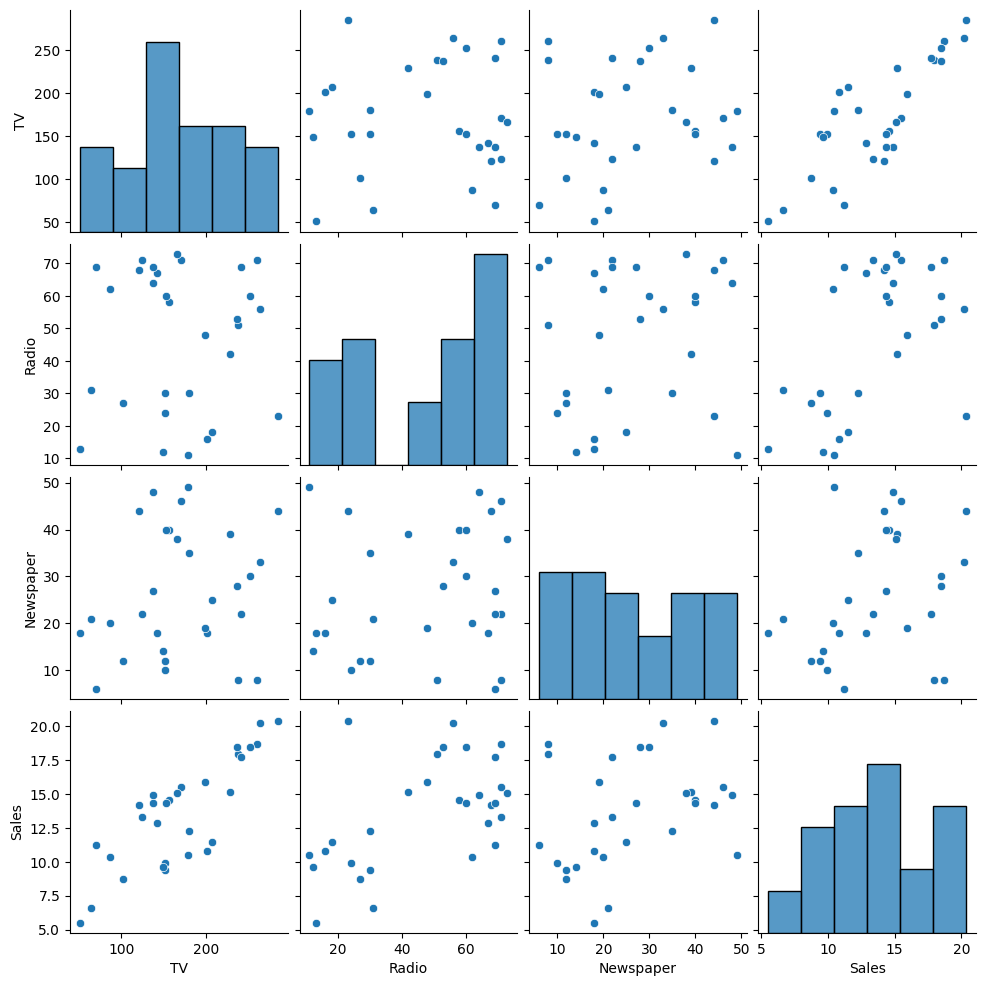

In [22]:
sns.pairplot(df)
plt.show()


In [23]:
#prepare data
X = df[["TV","Radio","Newspaper"]]
y = df["Sales"]

In [24]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [26]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print("RMSE:", rmse)

RMSE: 1.0223646378122269


In [27]:
import sklearn
print(sklearn.__version__)


1.6.1


In [28]:
#print coefficients

print("Intercept:", model.intercept_)
print("Coefficients:")
print(pd.Series(model.coef_, index=X.columns))


Intercept: 0.2183372141513651
Coefficients:
TV           0.047960
Radio        0.087245
Newspaper    0.047803
dtype: float64


In [29]:
#predict sales for a new ad budget

new_data = pd.DataFrame({"TV": [100], "Radio": [20], "Newspaper": [10]})
print("Predicted Sales:", model.predict(new_data)[0])


Predicted Sales: 7.237274813160909


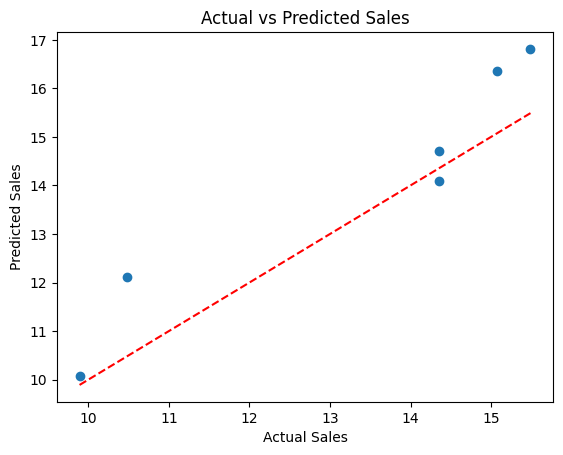

In [30]:
#visualize predicted vs actual sales

import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()

